# KNN Classifier

### Dataset

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [10]:
#Load data
iris = pd.read_csv('Iris.csv')
#data cleaning
iris.drop(columns="Id",inplace=True)

In [11]:
#features and labels
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(120, 4)
(120,)
(30, 4)
(30,)


In [13]:
''' using a L2 distance '''
def dist(a,b):
    return np.linalg.norm(a-b,2)

In [14]:
''' A K nearest Classifier Parameterized by K,X_train,y_train '''
''' returns the class with max votes '''
def KNN_Classifier(K,X_train  ,y_train,input_x):
    count = {}
    res = []
    for i in range(len(X_train)):
        x = X_train[i]
        d = dist(x,np.copy(input_x))
        res.append([d,y_train[i]])
    sorted_res = sorted(res,key = lambda x : x[0])
    for i in range(K):
        r = sorted_res[i][1]
        if r in count.keys():
            count[r] += 1
        else:
            count[r] = 1
    final_votes = -1
    final_label = ""
    for s in count.keys():
        if(count[s] > final_votes):
            final_label = s
            final_votes = count[s]
    return final_label
        

In [15]:
K_vals = [1,3,5,7,9,11,13,15]
Accuracy = []
A = []
for i in range(len(K_vals)):
    k = K_vals[i]
    #print(k)
    #print("")
    d = len(X_test)
    acc = 0
    for j in range(d):
        input_x = X_test[j]
        res_y = KNN_Classifier(k,X_train,y_train,input_x)
        #print(res_y)
        #print(y_test[j])
        if(res_y == y_test[j]): 
            acc += 1
    A.append(acc)
    Accuracy.append(acc/d)
    #print(acc)
    #print(d)
    #print(" ")

In [16]:
print(Accuracy)
print(A)

[1.0, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0]
[30, 29, 29, 30, 30, 30, 30, 30]


Text(0, 0.5, 'Accuracy')

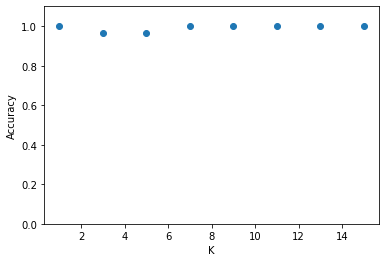

In [17]:
import matplotlib.pyplot as plt
#fig = plt.figure(figsize = (30,30))
ax = plt.gca()
#ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 1.1])
plt.scatter(K_vals,Accuracy)
plt.xlabel("K")
plt.ylabel("Accuracy")

